In [36]:
#importing some important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
import warnings
warnings.filterwarnings("ignore")

In [37]:
# reading the data from csv file
data=pd.read_csv('clickfraud.csv')

In [38]:
print(data.shape)  # Printing the shape of data with rows and features
print(data.ndim)   # Printing the dimension of data
data.dtypes        # Data Types of each features

(1441685, 8)
2


record            int64
channel           int64
os                int64
device            int64
app               int64
ip                int64
click_time       object
is_attributed     int64
dtype: object

In [39]:
data.head(8) # Printing some data from the top

,record,channel,os,device,app,ip,click_time,is_attributed
0,58316,280,16,1,3,90717,2017-11-07 01:43:37,0
1,58317,215,13,1,9,113867,2017-11-07 01:43:37,0
2,58318,489,13,1,14,125396,2017-11-07 01:43:37,0
3,58319,379,20,1,3,34779,2017-11-07 01:43:37,0
4,58320,442,13,1,14,134288,2017-11-07 01:43:37,0
5,58321,409,19,1,12,64188,2017-11-07 01:43:37,0
6,58322,319,15,1,11,94867,2017-11-07 01:43:37,0
7,58323,113,32,1,10,93467,2017-11-07 01:43:37,0


In [40]:
data.tail(8) # Printing some data from the bottom

,record,channel,os,device,app,ip,click_time,is_attributed
1441677,1499993,245,19,1,15,124574,2017-11-07 02:10:56,0
1441678,1499994,205,47,2,2,36183,2017-11-07 02:10:56,0
1441679,1499995,280,18,1,3,49602,2017-11-07 02:10:56,0
1441680,1499996,274,19,1,35,140149,2017-11-07 02:10:56,1
1441681,1499997,135,13,1,28,111819,2017-11-07 02:10:56,0
1441682,1499998,265,8,1,15,38971,2017-11-07 02:10:56,0
1441683,1499999,463,10,1,14,31345,2017-11-07 02:10:56,0
1441684,1500000,134,3,1,1,164236,2017-11-07 02:10:56,0


In [41]:
data=data.drop('record',axis=1) # Deleti ng the features with no use

In [42]:
sum(data.duplicated(subset=list(data.columns))) #Checking if some duplicate data present in the dataset

27095

In [43]:
# As duplicate values are present in the dataset 
# Delete them
data.drop_duplicates(subset=list(data.columns),keep='first',inplace=True)

In [44]:
sum(data.duplicated(subset=list(data.columns)))  # Cross verifing if data is deleted or not

0

In [45]:
# Calculating the percentage of data with is_attributed feture value be 0
percentage=(data.is_attributed.values==0).mean()
percentage*100

99.64286471698513

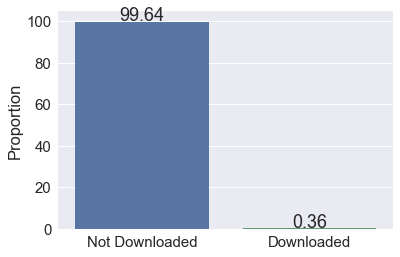

In [46]:
# Plotting the graph for the same as above 
plot=sns.barplot(['Not Downloaded','Downloaded'],[percentage*100,(1-percentage)*100])
plot.set(ylabel='Proportion')
for i in range(2):
    a=plot.patches[i]
    height=a.get_height()
    value=abs(percentage-i)
    plot.text(a.get_x()+a.get_width()/2.,height+0.5,round(value*100,2),ha="center")

##### The above graph shows the percentage of "Not Downloaded" data vs "Downloaded" Data

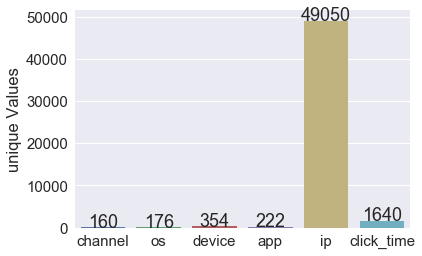

In [55]:
# Calculting the number of unique values for each 
# features and plottiing the graph for same
unique_values=[]
for x in data.columns:
    unique_values.append(len(data[x].unique()))

unique_values.pop()
#print(unique_values)
plot=sns.barplot(['channel','os','device','app','ip','click_time'],unique_values)
plot.set(ylabel='unique Values')
for i in range(len(unique_values)):
    a=plot.patches[i]
    height=a.get_height()
    width=a.get_width()
    value=abs(percentage-i)
    plot.text(a.get_x()+width/2.,height+1,unique_values[i],ha='center')

#### The above graph Shows the number of unique values in particular feature

###  Checking if any null values present in the features

In [56]:
data.ip.isna().any() # checking if null values presesnt in IP feature or not

False

In [57]:
data.channel.isna().any() # checking if null values presesnt in Channel feature or not

False

In [58]:
data.os.isna().any() # checking if null values presesnt in OS feature or not

False

In [59]:
data.device.isna().any() # checking if null values presesnt in Device feature or not

False

In [60]:
data.app.isna().any() # checking if null values presesnt in App feature or not

False

In [61]:
data.click_time.isna().any() # checking if null values presesnt in Click Time feature or not

False

In [62]:
# Calculating the percentage of ip's having the is_attributed values as 0 or 1
ip_add_1=data.ip[data.is_attributed==1]
set_ip_add_1=set(ip_add_1.unique())

ip_add_0=data.ip[data.is_attributed==0]
set_ip_add_0=set(ip_add_0.unique())

ip_download=set_ip_add_1-set_ip_add_0

ip_fraudent=set_ip_add_0-set_ip_add_1

print(len(ip_download))
print(len(ip_fraudent))
print("The number of Ip which downloaded by the click",round((len(ip_download)/49050)*100,2),'%')
print("The number of Ip which were fraudent click",round((len(ip_fraudent)/49050)*100,2),'%')

819
44622
The number of Ip which downloaded by the click 1.67 %
The number of Ip which were fraudent click 90.97 %


In [63]:
# Working with the Click_time to check its uniquness
data['click_time']=pd.to_datetime(data['click_time'],errors='coerce')
data['roundingoff_click']=data['click_time'].dt.round('H')
data['click_time'].unique()

array(['2017-11-07T01:43:37.000000000', '2017-11-07T01:43:38.000000000',
       '2017-11-07T01:43:39.000000000', ...,
       '2017-11-07T02:10:54.000000000', '2017-11-07T02:10:55.000000000',
       '2017-11-07T02:10:56.000000000'], dtype='datetime64[ns]')

In [64]:
#rounded off the time to hours and checked the unique time
data['roundingoff_click'].unique()

array(['2017-11-07T02:00:00.000000000'], dtype='datetime64[ns]')

In [65]:
data=data.drop('click_time',axis=1)
data=data.drop('roundingoff_click',axis=1)

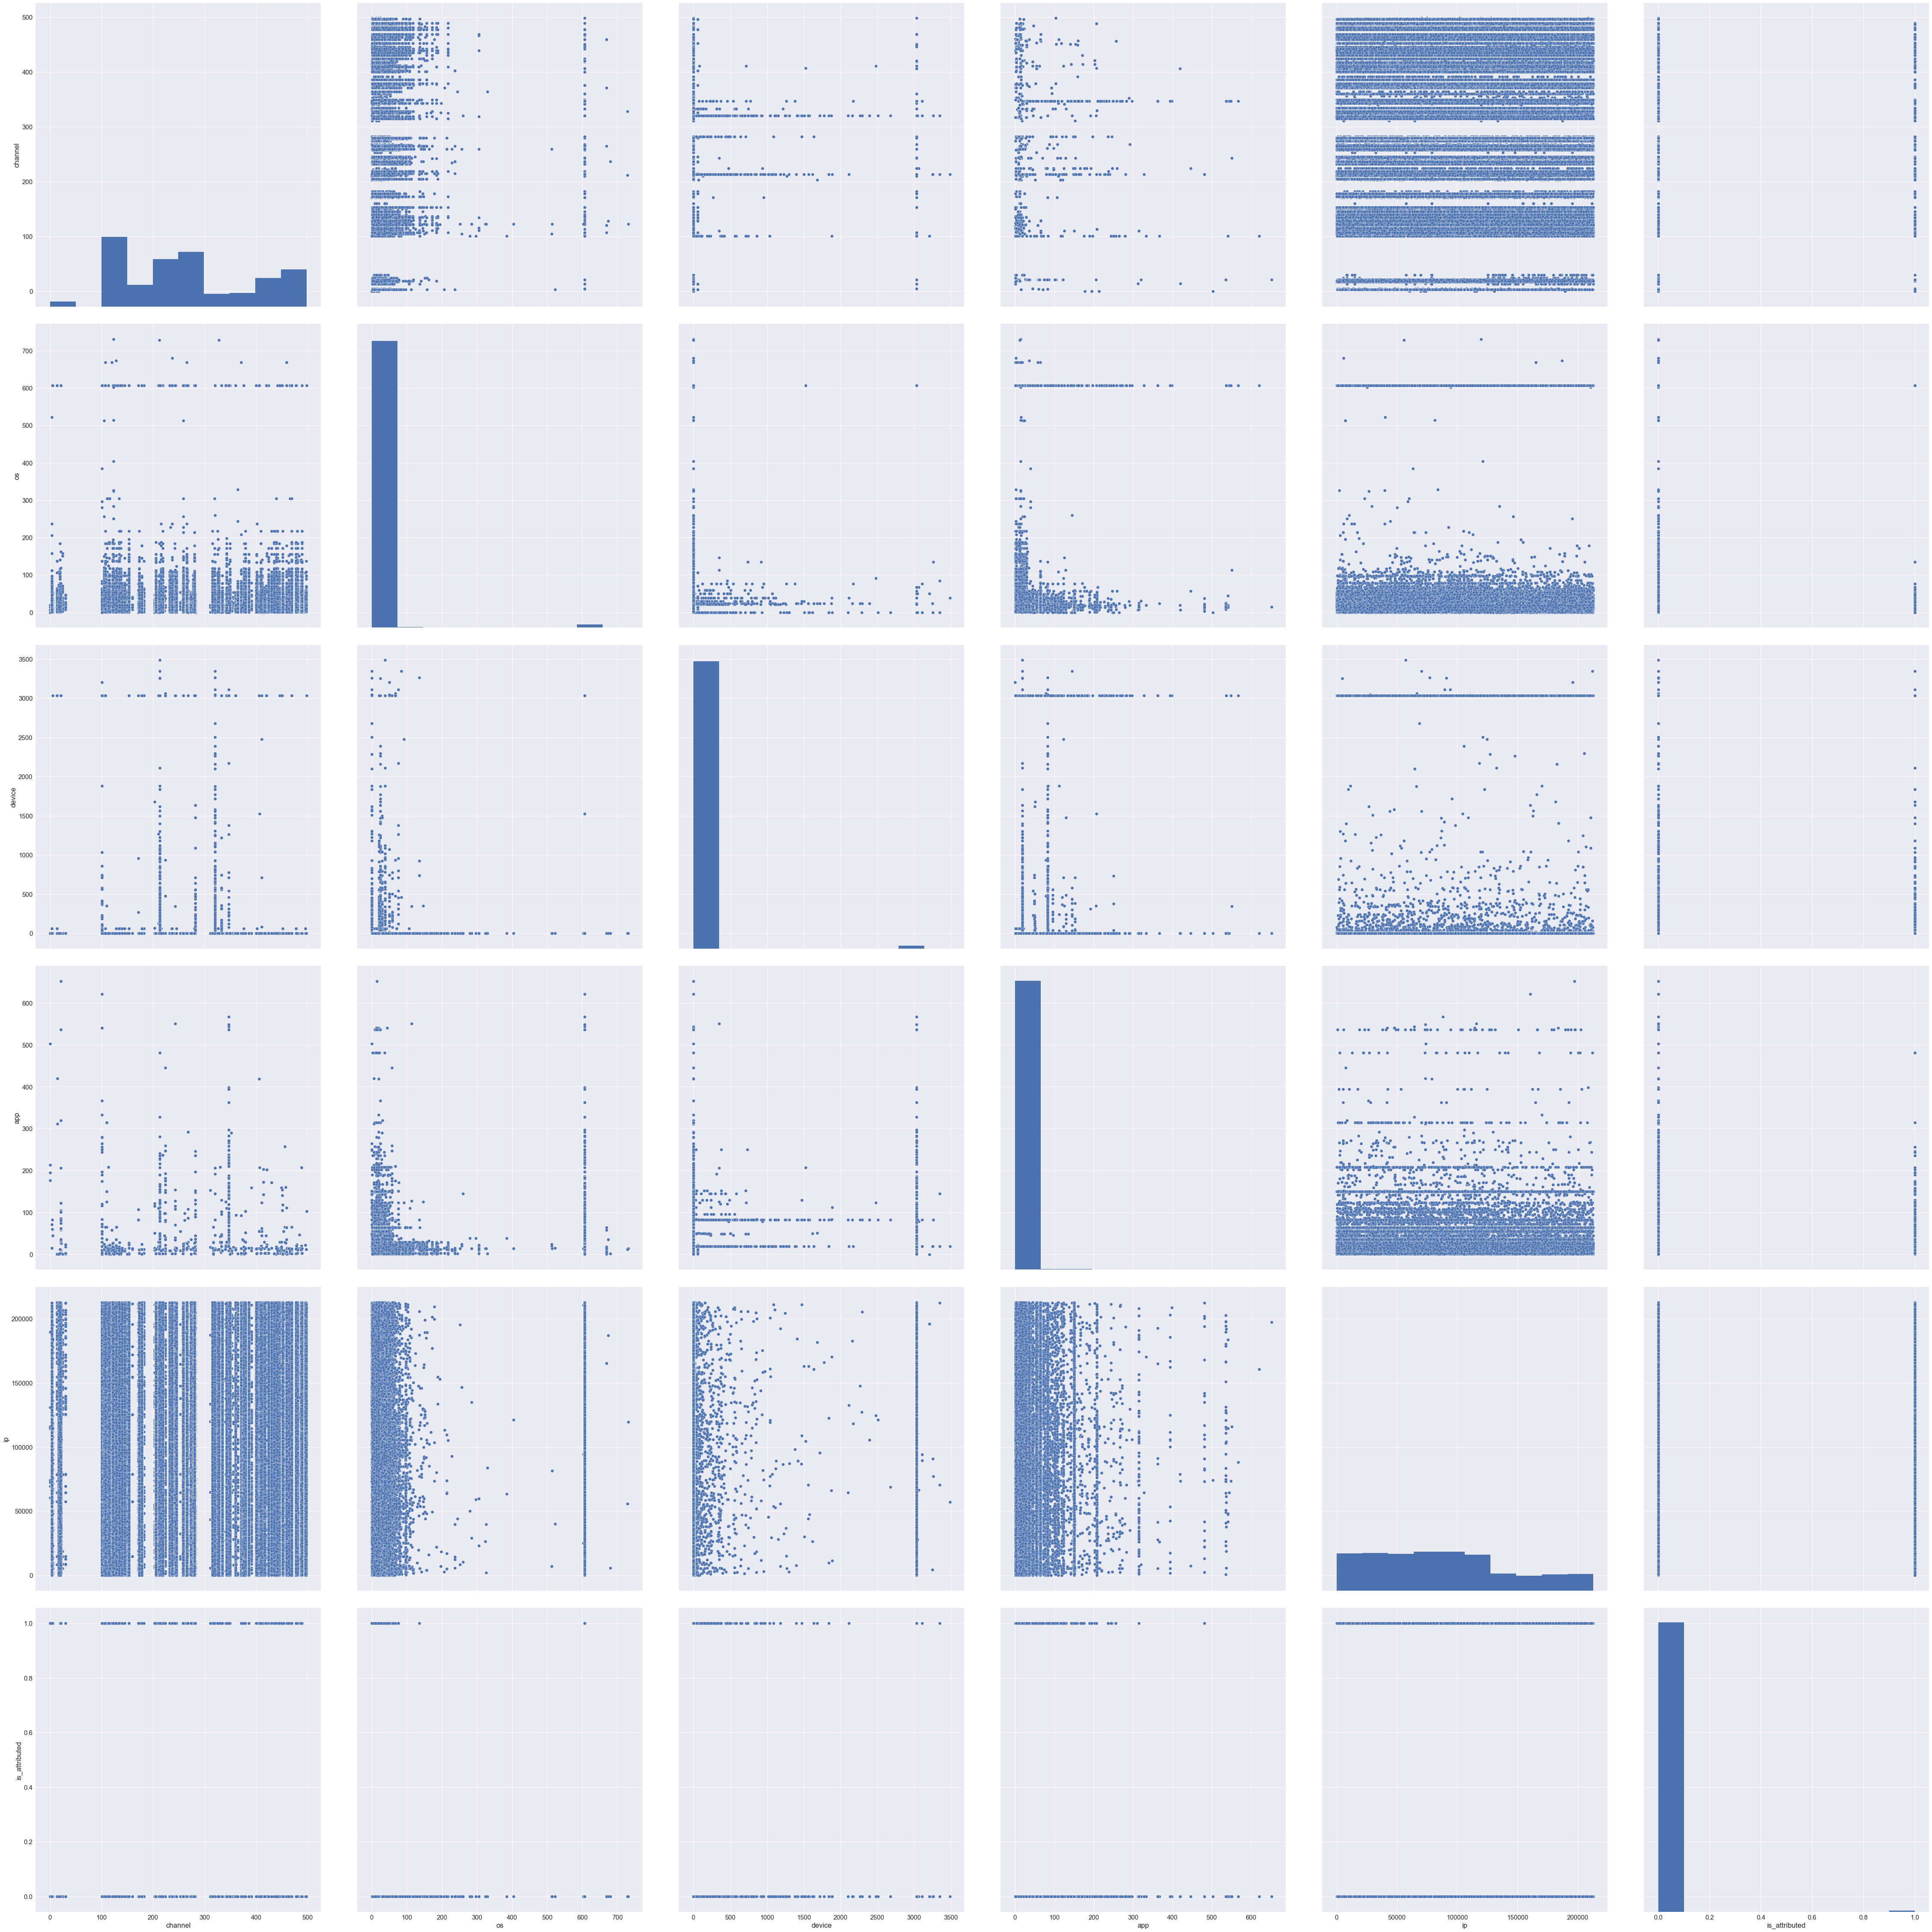

In [68]:
#Plotting the EDA to check if the data is linearly seperable or not
col=['channel','os','device','app','ip','is_attributed']
sns.pairplot(data[col],size=10.5)
plt.tight_layout()
plt.show()

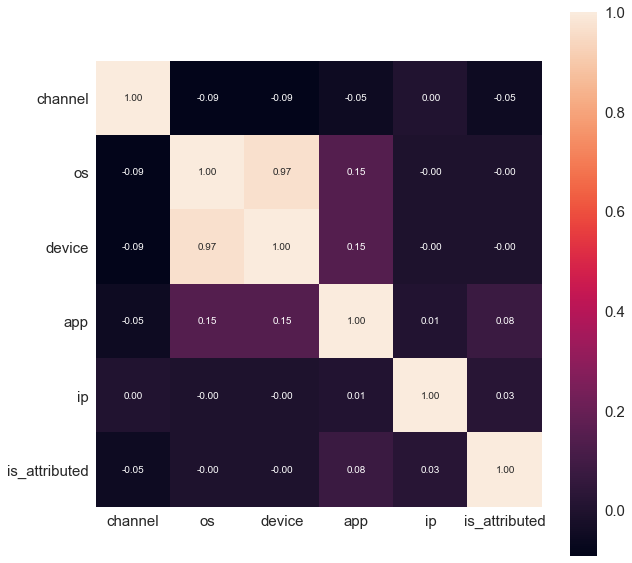

In [24]:
# Plotting the Heat Map
import numpy as np
cm=np.corrcoef(data[col].values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
fm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=col,xticklabels=col)
plt.show()

In [25]:
y=data['is_attributed']
data=data.drop('is_attributed',axis=1)

In [26]:
x=data

In [27]:
# Standardizing the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_std = sc.fit_transform(x)
x_std

array([[5.62248996e-01, 2.18878249e-02, 2.86944046e-04, 4.60122699e-03,
        4.26329518e-01],
       [4.31726908e-01, 1.77838577e-02, 2.86944046e-04, 1.38036810e-02,
        5.35135008e-01],
       [9.81927711e-01, 1.77838577e-02, 2.86944046e-04, 2.14723926e-02,
        5.89321552e-01],
       ...,
       [5.32128514e-01, 1.09439124e-02, 2.86944046e-04, 2.30061350e-02,
        1.83122224e-01],
       [9.29718876e-01, 1.36798906e-02, 2.86944046e-04, 2.14723926e-02,
        1.47279863e-01],
       [2.69076305e-01, 4.10396717e-03, 2.86944046e-04, 1.53374233e-03,
        7.71870373e-01]])

In [28]:
# Splitting the dataset with train data=70% and test data=30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x_std,y,test_size = 0.3, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(X_train)
print(X_test)

(990213, 5)
(424377, 5)
[[2.42971888e-01 2.59917921e-02 2.86944046e-04 3.98773006e-02
  4.03031514e-01]
 [2.75100402e-01 3.69357045e-02 2.86944046e-04 4.60122699e-03
  4.82504171e-02]
 [3.57429719e-01 4.10396717e-02 5.73888092e-04 1.53374233e-03
  6.87895096e-02]
 ...
 [4.11646586e-01 2.46238030e-02 2.86944046e-04 4.60122699e-03
  3.64434940e-01]
 [2.91164659e-01 4.78796170e-02 2.86944046e-04 1.22699387e-02
  6.83025874e-01]
 [5.32128514e-01 1.77838577e-02 5.73888092e-04 1.84049080e-02
  1.52487486e-01]]
[[4.89959839e-01 1.36798906e-02 2.86944046e-04 1.38036810e-02
  6.59920570e-01]
 [7.61044177e-01 2.73597811e-02 2.86944046e-04 4.60122699e-03
  3.16428924e-01]
 [4.73895582e-01 2.59917921e-02 2.86944046e-04 3.06748466e-03
  6.70317016e-02]
 ...
 [3.47389558e-01 1.91518468e-02 2.86944046e-04 4.60122699e-03
  6.96486734e-01]
 [4.39759036e-01 2.59917921e-02 2.86944046e-04 3.06748466e-03
  3.77251898e-01]
 [4.73895582e-01 2.73597811e-02 2.86944046e-04 3.06748466e-03
  4.27725425e-01]]


## Training and testing the models to find the best model which fits this data

#### 1) SVM
#### 2) Logistic Regression
#### 3) KNeighbors Classifier
#### 4) Decision Tree Classifier
#### 5) Random Forest Classifier

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
ppn=SVC(C=1,kernel='linear')
ppn.fit(X_train,y_train)
y_pred=ppn.predict(X_test)
ac1=accuracy_score(y_test,y_pred)
print(ac1*100)
cm1=confusion_matrix(y_test,y_pred)
cr1=classification_report(y_test,y_pred)
print(cm1)
print(cr1)

99.63782203088292
[[422840      0]
 [  1537      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    422840
           1       0.00      0.00      0.00      1537

    accuracy                           1.00    424377
   macro avg       0.50      0.50      0.50    424377
weighted avg       0.99      1.00      0.99    424377



In [30]:
from sklearn.linear_model import LogisticRegression
ppn=LogisticRegression(C=10,penalty='l2')
ppn.fit(X_train,y_train)
y_pred=ppn.predict(X_test)
ac2=accuracy_score(y_test,y_pred)
print(ac2*100)
cm2=confusion_matrix(y_test,y_pred)
cr2=classification_report(y_test,y_pred)
print(cm2)
print(cr2)

99.62698261215853
[[422794     46]
 [  1537      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    422840
           1       0.00      0.00      0.00      1537

    accuracy                           1.00    424377
   macro avg       0.50      0.50      0.50    424377
weighted avg       0.99      1.00      0.99    424377



In [32]:
from sklearn.neighbors import KNeighborsClassifier
ppn=KNeighborsClassifier(n_neighbors=2)
ppn.fit(X_train,y_train)
y_pred=ppn.predict(X_test)
ac3=accuracy_score(y_test,y_pred)
print(ac3*100)
cm3=confusion_matrix(y_test,y_pred)
cr3=classification_report(y_test,y_pred)
print(cm3)
print(cr3)

99.72453738067803
[[422632    208]
 [   961    576]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    422840
           1       0.73      0.37      0.50      1537

    accuracy                           1.00    424377
   macro avg       0.87      0.69      0.75    424377
weighted avg       1.00      1.00      1.00    424377



In [33]:
from sklearn.tree import DecisionTreeClassifier
ppn=DecisionTreeClassifier(criterion='gini',max_depth=3)
ppn.fit(X_train,y_train)
y_pred=ppn.predict(X_test)
ac4=accuracy_score(y_test,y_pred)
print(ac4*100)
cm4=confusion_matrix(y_test,y_pred)
cr4=classification_report(y_test,y_pred)
print(cm4)
print(cr4)

99.75446360193885
[[422692    148]
 [   894    643]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    422840
           1       0.81      0.42      0.55      1537

    accuracy                           1.00    424377
   macro avg       0.91      0.71      0.78    424377
weighted avg       1.00      1.00      1.00    424377



In [34]:
from sklearn.ensemble import RandomForestClassifier
ppn=RandomForestClassifier(n_estimators=200)
ppn.fit(X_train,y_train)
y_pred=ppn.predict(X_test)
ac5=accuracy_score(y_test,y_pred)
print(ac5*100)
cm5=confusion_matrix(y_test,y_pred)
cr5=classification_report(y_test,y_pred)
print(cm5)
print(cr5)

99.75634871823874
[[422491    349]
 [   685    852]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    422840
           1       0.71      0.55      0.62      1537

    accuracy                           1.00    424377
   macro avg       0.85      0.78      0.81    424377
weighted avg       1.00      1.00      1.00    424377

